# `Генерация исключений`

### Доступ к обьекту исключений

In [2]:
try:
    with open("/file/not/found") as f:
        content = f.read()
except OSError as err:
    print(err.errno, err.strerror)

2 No such file or directory


### Доступ к обьекту исключений, атрибут args

In [ ]:
# атрибут args
import os.path

filename = "/file/not/found"
try:
    if not os.path.exists(filename):
        raise ValueError("file not exists", filename)
except ValueError as err:
    message, filename = err.args[0], err.args[1]
    print(message, code)

### Доступ к стеку вызовов

In [7]:
import traceback

try:
    with open("/file/not/found") as f:
        content = f.read()
except OSError as err:
    trace = traceback.print_exc()
    print(trace)

None


Traceback (most recent call last):
  File "<ipython-input-7-36f4cdcf583a>", line 4, in <module>
    with open("/file/not/found") as f:
FileNotFoundError: [Errno 2] No such file or directory: '/file/not/found'


### Генерация исключения, инструкция raise

In [2]:
try:
    raw = input("Enter a number: ")
    if not raw.isdigit():
        raise ValueError
except ValueError:
    print("Value error!")

Enter a number: hello
Value error!


### Инструкция raise для экземпляра ValueError

In [5]:
try:
    raw =input("Enter number: ")
    if not raw.isdigit():
        raise ValueError("Bad number", raw)
except ValueError as err:
    print("Vallue error!", err)

Enter number: hello
Vallue error! ('Bad number', 'hello')


### Проброс исключения "выше"

In [8]:
try:
    raw =input("Enter number: ")
    if not raw.isdigit():
        raise ValueError("Bad number ", raw)
except ValueError as err:
    print("Vallue error!", err)
    # делигирование обработки исключения
    raise

Enter number: hello
Vallue error! ('Bad number ', 'hello')


ValueError: ('Bad number ', 'hello')

### Исключение через raise from Exception 
#### если исключений много

In [12]:
try:
    raw =input("Enter number: ")
    
    if not raw.isdigit():
        raise ValueError("Bad number ", raw)
except ValueError as err:
    print("Vallue error!", err)
    # делигирование обработки исключения
    raise TimeoutError("Error") from err

Enter number: hello
Vallue error! ('Bad number ', 'hello')


TimeoutError: Error

### Инструкция assert

In [14]:
assert True

In [15]:
assert 1 == 0

AssertionError: 

In [17]:
assert 1 == 0, "1 not equal 0"

AssertionError: 1 not equal 0

### Инструкция assert, флаг -O

In [23]:
def get_by_id(id):
    assert isinstance(id, int), "id must be int"
    
    print("searching")

if __name__ == "__main__":
    get_by_id(12)

searching


In [24]:
def get_by_id(id):
    assert isinstance(id, int), "id must be int"
    
    print("searching")

if __name__ == "__main__":
    get_by_id("do")

AssertionError: id must be int

###  -O
```python
def get_by_id(id):
    assert isinstance(id, int), "id must be int"
    
    print("searching")

if __name__ == "__main__":
```
    get_by_id("do")
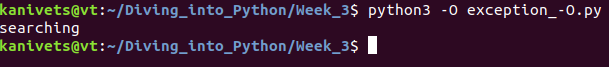

### Производительность исключений

In [26]:
%%timeit
my_dict = {"foo": 1}
for _ in range(1000):
    try:
        my_dict["bar"]
    except KeyError:
        pass

946 µs ± 53.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%%timeit
my_dict = {"foo": 1}
for _ in range(1000):
    if "bar" in my_dict:
        _ = my_dict["bar"]

257 µs ± 9.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
